# 3. Pre-Processing <a id="data_wrangling"></a>

<a id="contents"></a>
# Table of Contents  
3.1. [Introduction](#introduction) <br>
3.2. [Imports](#imports)  <br>
3.3. [Data Processing](#process)<br>
3.4. [Data Splitting](#split)<br>
3.5. [Save Updated Data](#save)

## 3.1 Introduction<a id="introduction"></a>

The goal of this notebook is to create a cleaned development dataset to be used to complete the modeling step of my project.

## 3.2 Imports<a id="imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

# Load the dataset
data = pd.read_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Capstone 3/df_eda.csv')
print("Dataset loaded.")

# Print dataset columns to verify
print(data.columns)

Dataset loaded.
Index(['city', 'street_address', 'state', 'zipcode', 'house_type', 'price',
       'bathrooms', 'full_bath', 'half_bath', 'bedrooms', 'yearBuilt',
       'latitude', 'longitude', 'sqft', 'school_rating', 'borough'],
      dtype='object')


## 3.3 Data Processing

In [2]:
# Define target variable and features
target = 'price'
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
if target in numeric_features:
    numeric_features.remove(target)
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Apply log transformation to the target variable
data[target] = np.log1p(data[target])

# Define preprocessor for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## 3.4 Data Splitting

In [3]:
# Split the data into training and testing sets
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing and transformation pipeline
transformation_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Transform the data
X_train_transformed = transformation_pipeline.fit_transform(X_train).toarray()
X_test_transformed = transformation_pipeline.transform(X_test).toarray()

## 3.5 Save Updated Data

In [4]:
# Save preprocessed data
np.save('X_train_dense.npy', X_train_transformed)
np.save('X_test_dense.npy', X_test_transformed)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

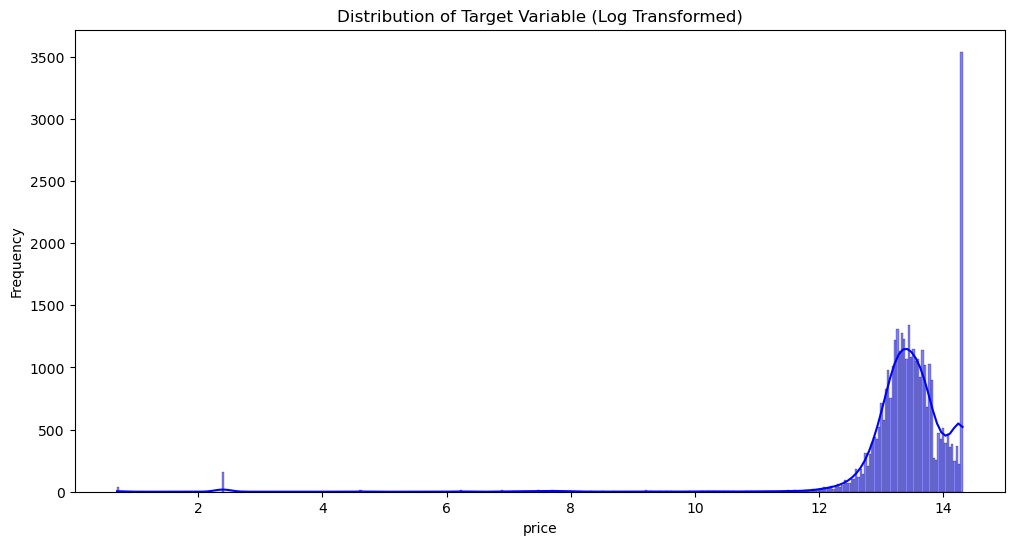

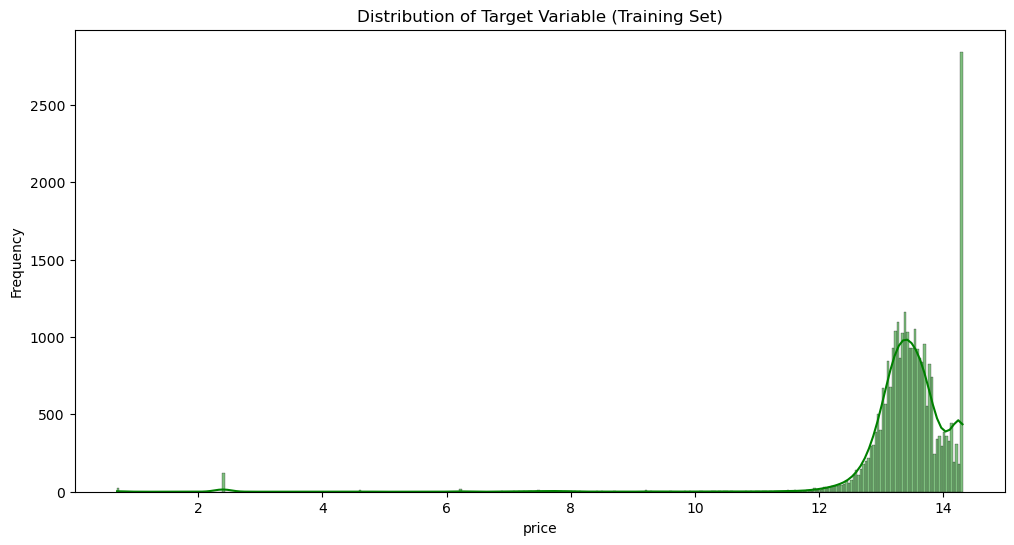

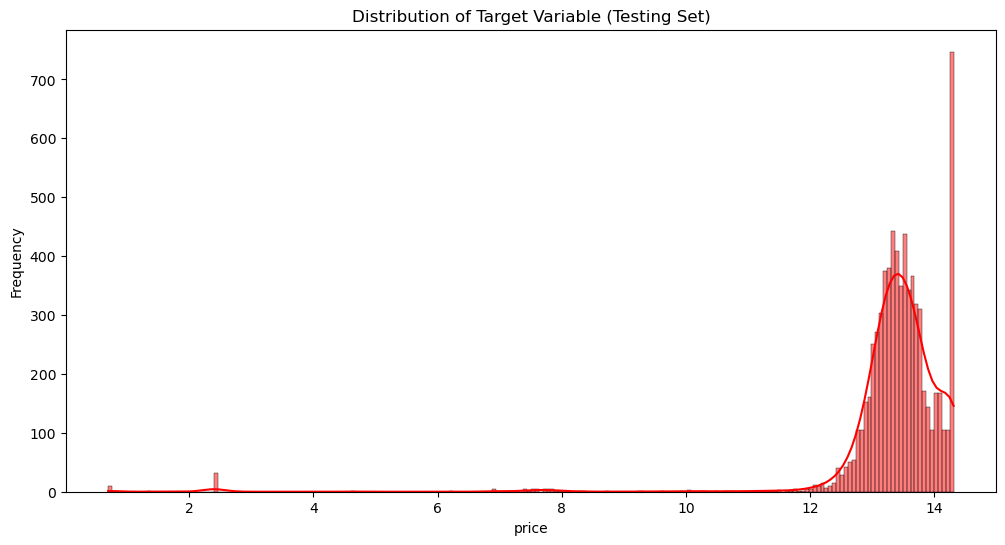

In [5]:
# Visualize the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(data[target], kde=True, color='blue')
plt.title('Distribution of Target Variable (Log Transformed)')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution in the training set
plt.figure(figsize=(12, 6))
sns.histplot(y_train, kde=True, color='green')
plt.title('Distribution of Target Variable (Training Set)')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution in the testing set
plt.figure(figsize=(12, 6))
sns.histplot(y_test, kde=True, color='red')
plt.title('Distribution of Target Variable (Testing Set)')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()